# Time Series Forecasting by using LSTM model

In [ ]:
# collate the data from pandas_datareader

In [ ]:
!pip install pandas-datareader

In [1]:
import pandas_datareader as pdr

In [ ]:
key="f555f$$$$$$$$$$$$$$$$$$$$@@@@@@@@@@@"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('apple.csv')

In [ ]:
df1 = pdr.get_data_tiingo('GOOGL', api_key=key)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1.to_csv('google.csv')

In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2017-12-18 00:00:00+00:00  176.42  177.20  174.86  174.88  28831533   
       2017-12-19 00:00:00+00:00  174.54  175.39  174.09  175.03  27078872   
       2017-12-20 00:00:00+00:00  174.35  175.42  173.25  174.87  23000392   
       2017-12-21 00:00:00+00:00  175.01  176.02  174.10  174.17  20356826   
       2017-12-22 00:00:00+00:00  175.01  175.42  174.50  174.68  16052615   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-12-18 00:00:00+00:00  41.937498  42.122915  41.566664  41.571419   
       2017-12-19 00:00:00+00:00  41.490596  41.692653  41.383624  41.607076   
       2017-12-20 00:00:00+00:00  41.445430  41.699784  41.183945  41.569041   
       2017-12-21 00:00:00+00:00  41.602321  41.842412  41.386002  41.402642   
       2017-12-22 00:00:00+00:00  41.602321  41.699784  41.481087  41.523876   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-12-18 00:00:00+00:00  115326132      0.0          1.0  
       2017-12-19 00:00:00+00:00  108315488      0.0          1.0  
       2017-12-20 00:00:00+00:00   92001568      0.0          1.0  
       2017-12-21 00:00:00+00:00   81427304      0.0          1.0  
       2017-12-22 00:00:00+00:00   64210460      0.0          1.0

In [ ]:
dataset = df.reset_index()['close']

In [ ]:
dataset.head(20)

0     176.42
1     174.54
2     174.35
3     175.01
4     175.01
5     170.57
6     170.60
7     171.08
8     169.23
9     172.26
10    172.23
11    173.03
12    175.00
13    174.35
14    174.33
15    174.29
16    175.28
17    177.09
18    176.19
19    179.10
Name: close, dtype: float64

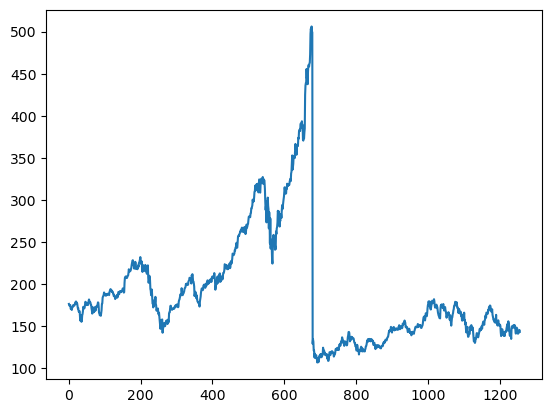

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataset)

In [3]:
import pandas as pd
mydata = pd.read_csv('/content/apple.csv')
mydata.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-18 00:00:00+00:00,176.42,177.20,174.86,174.88,28831533,41.937498,42.122915,41.566664,41.571419,115326132,0.0,1.0
1,AAPL,2017-12-19 00:00:00+00:00,174.54,175.39,174.09,175.03,27078872,41.490596,41.692653,41.383624,41.607076,108315488,0.0,1.0
2,AAPL,2017-12-20 00:00:00+00:00,174.35,175.42,173.25,174.87,23000392,41.445430,41.699784,41.183945,41.569041,92001568,0.0,1.0
3,AAPL,2017-12-21 00:00:00+00:00,175.01,176.02,174.10,174.17,20356826,41.602321,41.842412,41.386002,41.402642,81427304,0.0,1.0
4,AAPL,2017-12-22 00:00:00+00:00,175.01,175.42,174.50,174.68,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0


In [4]:
mydata1 = mydata.reset_index()['close']

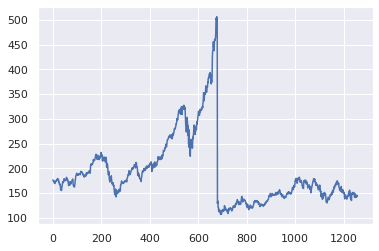

In [5]:
plt.plot(mydata1)

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(mydata1).reshape(-1,1))

In [ ]:
print(df1)

[[0.17427677]
 [0.16956794]
 [0.16909205]
 ...
 [0.09430182]
 [0.09675642]
 [0.0910958 ]]


In [7]:
# split the data into training and test
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [ ]:
print(training_size, test_size)

879 378


In [24]:
#train_data

In [25]:
#test_data

In [8]:
# Time Series Forecasting basis LSTM mdoel
def create_dataset(dataset, time_step=1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        # i = 0, 0,1,2,3....99 , y = 100
        datax.append(a)
        datay.append(dataset[i+time_step, 0])
    return np.array(datax), np.array(datay)

In [9]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(778, 100) (778,)
(277, 100) (277,)


In [11]:
# reshape input to be (sample, time steps, features) which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train

array([[[0.17427677],
        [0.16956794],
        [0.16909205],
        ...,
        [0.20167815],
        [0.20839073],
        [0.20475892]],

       [[0.16956794],
        [0.16909205],
        [0.17074515],
        ...,
        [0.20839073],
        [0.20475892],
        [0.20365686]],

       [[0.16909205],
        [0.17074515],
        [0.17074515],
        ...,
        [0.20475892],
        [0.20365686],
        [0.19937383]],

       ...,

       [[0.05257358],
        [0.0630933 ],
        [0.07521603],
        ...,
        [0.04984346],
        [0.05082029],
        [0.0482655 ]],

       [[0.0630933 ],
        [0.07521603],
        [0.08072636],
        ...,
        [0.05082029],
        [0.0482655 ],
        [0.05137132]],

       [[0.07521603],
        [0.08072636],
        [0.09036944],
        ...,
        [0.0482655 ],
        [0.05137132],
        [0.05921102]]])

In [ ]:
x_test

array([[[0.06249217],
        [0.05916093],
        [0.06376957],
        ...,
        [0.11183469],
        [0.1105072 ],
        [0.1113087 ]],

       [[0.05916093],
        [0.06376957],
        [0.06797746],
        ...,
        [0.1105072 ],
        [0.1113087 ],
        [0.10920476]],

       [[0.06376957],
        [0.06797746],
        [0.06727614],
        ...,
        [0.1113087 ],
        [0.10920476],
        [0.1101315 ]],

       ...,

       [[0.11571697],
        [0.12150282],
        [0.1183469 ],
        ...,
        [0.0903444 ],
        [0.08541014],
        [0.08969317]],

       [[0.12150282],
        [0.1183469 ],
        [0.11549155],
        ...,
        [0.08541014],
        [0.08969317],
        [0.08846587]],

       [[0.1183469 ],
        [0.11549155],
        [0.11211021],
        ...,
        [0.08969317],
        [0.08846587],
        [0.09430182]]])

In [12]:
#import basic package to build LSTM model
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=32,verbose=1)

Epoch 1/100
25/25 [==============================] - 10s 60ms/step - loss: 0.0204 - val_loss: 4.9752e-04
Epoch 2/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0102 - val_loss: 5.9091e-04
Epoch 3/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0083 - val_loss: 8.3061e-04
Epoch 4/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0068 - val_loss: 0.0015
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 2.9920e-04
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0053 - val_loss: 9.8589e-04
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0048 - val_loss: 4.9625e-04
Epoch 8/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 7.2373e-04
Epoch 9/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 4.3172e-04
Epoch 10/100
25/25 [==============================] - 1s 26ms/step 

In [16]:
# predict and check performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 7ms/step


In [17]:
train_predict

array([[ 2.07020715e-01],
       [ 2.10227773e-01],
       [ 2.11275503e-01],
       [ 2.11555287e-01],
       [ 2.11166531e-01],
       [ 2.10235626e-01],
       [ 2.09599316e-01],
       [ 2.09160075e-01],
       [ 2.09283814e-01],
       [ 2.09663942e-01],
       [ 2.10219398e-01],
       [ 2.10516155e-01],
       [ 2.10392907e-01],
       [ 2.09774449e-01],
       [ 2.10117951e-01],
       [ 2.11719602e-01],
       [ 2.14388475e-01],
       [ 2.17513353e-01],
       [ 2.20197797e-01],
       [ 2.21502557e-01],
       [ 2.21551135e-01],
       [ 2.21295744e-01],
       [ 2.20486641e-01],
       [ 2.19496503e-01],
       [ 2.17896387e-01],
       [ 2.16086686e-01],
       [ 2.13378251e-01],
       [ 2.10730046e-01],
       [ 2.08237752e-01],
       [ 2.05992863e-01],
       [ 2.03235060e-01],
       [ 2.01220587e-01],
       [ 1.99965015e-01],
       [ 1.99764401e-01],
       [ 2.00089380e-01],
       [ 2.01301560e-01],
       [ 2.01787382e-01],
       [ 2.02071860e-01],
       [ 2.0

In [18]:
test_predict

array([[0.11302911],
       [0.11334719],
       [0.11350219],
       [0.11277138],
       [0.111449  ],
       [0.11054279],
       [0.11016408],
       [0.11043089],
       [0.11175023],
       [0.11483385],
       [0.11953099],
       [0.12481125],
       [0.12979807],
       [0.13406093],
       [0.13586406],
       [0.13670464],
       [0.13862577],
       [0.14119256],
       [0.14348648],
       [0.14462474],
       [0.14583345],
       [0.14891249],
       [0.15425399],
       [0.1602428 ],
       [0.1671722 ],
       [0.17270835],
       [0.17591333],
       [0.17881407],
       [0.17922838],
       [0.17745513],
       [0.17423995],
       [0.17175701],
       [0.17118417],
       [0.17217068],
       [0.17517982],
       [0.17871757],
       [0.1819079 ],
       [0.1839584 ],
       [0.18475658],
       [0.18618488],
       [0.18732753],
       [0.18644112],
       [0.18327741],
       [0.17924333],
       [0.17545104],
       [0.17337754],
       [0.17291465],
       [0.172

In [19]:
# Transformback to original form
train_pred = scaler.inverse_transform(train_predict)
test_pred = scaler.inverse_transform(test_predict)

In [20]:
train_pred 

array([[189.49301 ],
       [190.77344 ],
       [191.19174 ],
       [191.30345 ],
       [191.14824 ],
       [190.77658 ],
       [190.52252 ],
       [190.34715 ],
       [190.39656 ],
       [190.54832 ],
       [190.7701  ],
       [190.88858 ],
       [190.83937 ],
       [190.59244 ],
       [190.72958 ],
       [191.36905 ],
       [192.4346  ],
       [193.6822  ],
       [194.75397 ],
       [195.27489 ],
       [195.29428 ],
       [195.19232 ],
       [194.8693  ],
       [194.47397 ],
       [193.83513 ],
       [193.11261 ],
       [192.03127 ],
       [190.97397 ],
       [189.97891 ],
       [189.08264 ],
       [187.9816  ],
       [187.17732 ],
       [186.67603 ],
       [186.59593 ],
       [186.72568 ],
       [187.20964 ],
       [187.40361 ],
       [187.51718 ],
       [187.95467 ],
       [188.9477  ],
       [190.13968 ],
       [190.89542 ],
       [191.6535  ],
       [192.42456 ],
       [193.05176 ],
       [193.57188 ],
       [193.81996 ],
       [194.0

In [21]:
test_pred

array([[151.96687],
       [152.09386],
       [152.15575],
       [151.86397],
       [151.33601],
       [150.9742 ],
       [150.82301],
       [150.92953],
       [151.45627],
       [152.68741],
       [154.56274],
       [156.6709 ],
       [158.66188],
       [160.36383],
       [161.08372],
       [161.41933],
       [162.18634],
       [163.21114],
       [164.12697],
       [164.58144],
       [165.064  ],
       [166.29332],
       [168.4259 ],
       [170.81694],
       [173.5835 ],
       [175.79381],
       [177.0734 ],
       [178.2315 ],
       [178.39693],
       [177.68896],
       [176.40529],
       [175.41399],
       [175.18527],
       [175.57915],
       [176.78055],
       [178.19298],
       [179.46672],
       [180.28539],
       [180.60406],
       [181.17432],
       [181.63052],
       [181.27663],
       [180.0135 ],
       [178.4029 ],
       [176.88882],
       [176.06099],
       [175.87617],
       [175.64798],
       [175.42526],
       [174.81934],


In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred))

229.1038813387919

In [23]:
math.sqrt(mean_squared_error(y_test, test_pred))

159.29062263086507

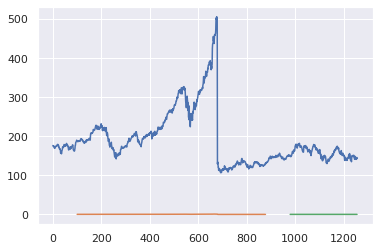

In [31]:
"""
# training prediction
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# test prediction
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1:len(df1)-1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
"""